In [1]:
# --- Importing Libraries ---

import pandas as pd # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import joblib # for saving and loading models




from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder # for encoding categorical variables
from sklearn.linear_model import LogisticRegression # for logistic regression model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # for evaluating the model performance
from xgboost import XGBClassifier # for XGBoost classifier
from sklearn.neighbors import KNeighborsClassifier # for K-Nearest Neighbors classifier
from imblearn.over_sampling import SMOTE # for handling class imbalance using SMOTE
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning using grid search


import warnings # to ignore warnings
warnings.filterwarnings("ignore") 

In [44]:
# --- Load Dataset ---

df = pd.read_csv("Telco-Customer-Churn.csv")  # adjust if needed
print("Shape of the dataset:", df.shape) # Display the shape of the dataset
print(df.head(5)) # Display the first 5 rows of the dataset


Shape of the dataset: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

In [45]:
# --- Data Preprocessing: Cleaning, Encoding, and Finalizing Dataset ---

print("\nData Types:\n", df.dtypes) # Check data types
print("\nMissing Values:\n", df.isnull().sum()) # Check for missing values 
print("\nClass Distribution:\n", df['Churn'].value_counts()) # This will show the distribution of the target variable 


# --- Data Cleaning: Fix TotalCharges ---

# Replace blank strings with NaN (just in case)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Optional: reset index
df.reset_index(drop=True, inplace=True)


# Double check:
print("\nMissing Values After Fix:\n", df.isnull().sum()) # Check for missing values again
print("Updated shape:", df.shape) # Display the updated shape of the dataset



# --- Encode Binary Categories with LabelEncoder ---
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklearn

le = LabelEncoder() # Initialize LabelEncoder
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] # This is a list of categorical columns that i need to change to ones and zeros


for col in binary_cols: # Loop through each binary column
    df[col] = le.fit_transform(df[col]) # This will loop through each column and apply the LabelEncoder to convert the categorical values to numerical values (0 or 1)

# one hot encoding is used for categorical variables with more than two categories. for example 'InternetService' has three categories: DSL, Fiber optic, and No internet service. this will create three new columns: 'InternetService_DSL', 'InternetService_Fiber optic', and 'InternetService_No internet service' with 0s and 1s indicating the presence of each category.

# --- One-Hot Encode Remaining Categorical Features ---
dummy_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# Only keep columns that are still in the DataFrame
existing_cols = [col for col in dummy_cols if col in df.columns]

df = pd.get_dummies(df, columns=existing_cols, drop_first=False, dtype=bool)

print("Final dataset shape after encoding:", df.shape)




Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilli

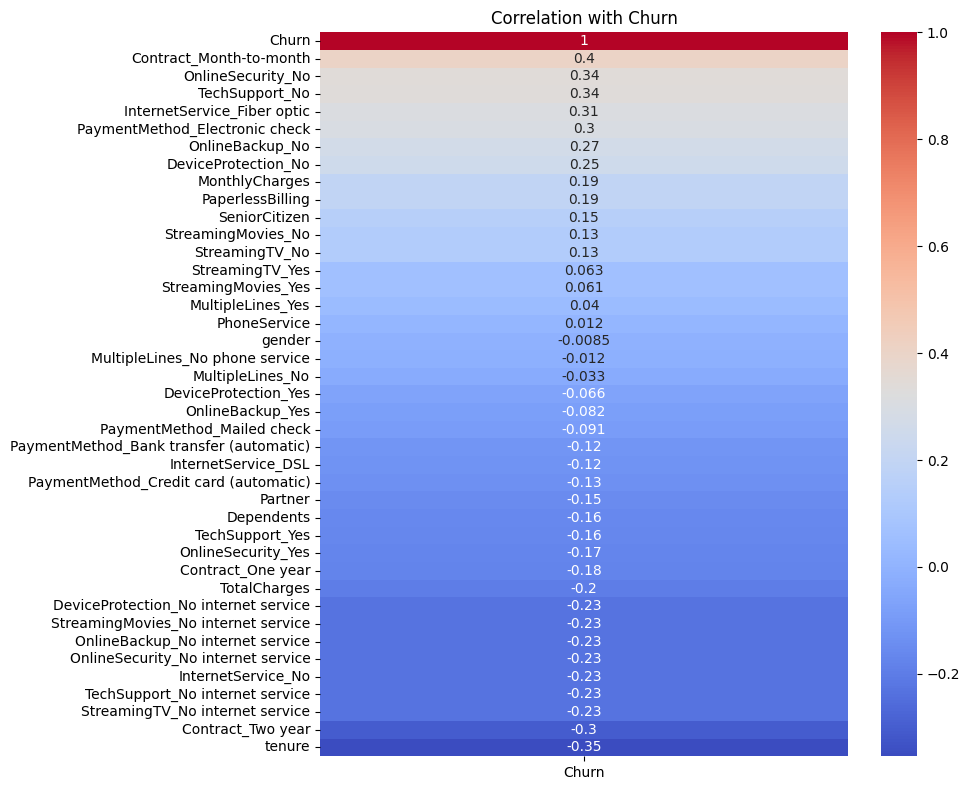

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fix empty strings and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# --- Correlation with Churn ---
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
corr = df.corr(numeric_only=True)  # Calculate the correlation matrix
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')  # Create a heatmap
plt.title("Correlation with Churn")
plt.tight_layout()
plt.show()



In [37]:
# --- Final Cleanup to Avoid Conversion Errors ---

# Force 'TotalCharges' to numeric, replace problematic strings with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop any rows with NaNs now (e.g. from TotalCharges)
df.dropna(inplace=True)

# Reset index to keep things tidy after dropping rows
df.reset_index(drop=True, inplace=True)


In [ ]:
# --- Defining Features and Target Variable ---
X = df.drop(columns=['Churn', 'customerID'])  # Drop both target and ID
y = df['Churn']                            # Target variable


# --- Splitting the Dataset into Training and Testing Sets ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test



Training set shape: (5625, 40)
Testing set shape: (1407, 40)


In [ ]:
# --- Apply SMOTE to the training data only ---
smote = SMOTE(random_state=42) # Initialize SMOTE with a random state for reproducibility
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) # Apply SMOTE to the training data

print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict()) # Display the shape and class distribution before SMOTE
print("After SMOTE:", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())  # Display the shape and class distribution after SMOTE


Before SMOTE: (5625, 40) {0: 4130, 1: 1495}
After SMOTE: (8260, 40) {1: 4130, 0: 4130}


In [62]:
# --- Define and Train the Models ---
logreg = LogisticRegression(max_iter=1000)

# --- Define hyperparameter grid ---
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # compatible with l1 and l2
}

# --- Setup GridSearch ---
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', verbose=1)
grid_logreg.fit(X_train_resampled, y_train_resampled)

# --- Get best model ---
best_logreg = grid_logreg.best_estimator_
print("Best Logistic Regression Params:", grid_logreg.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# --- Predict with best logistic regression ---
y_pred_best_log = best_logreg.predict(X_test) # Predict on the test set using the best model


# --- Evaluate the Best Logistic Regression Model ---
print("Best Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_log))
print("Classification Report:\n", classification_report(y_test, y_pred_best_log))


Best Logistic Regression Results:
Accuracy: 0.7796730632551528
Confusion Matrix:
 [[860 173]
 [137 237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.79      0.78      0.78      1407



In [ ]:
# --- Training the Logistic Regression Model ---



logreg = LogisticRegression(max_iter=1000) # Initialize the logistic regression model
logreg.fit(X_train_resampled, y_train_resampled) # Fit the model to the resampled training data

# --- Making Predictions ---
y_pred_log = logreg.predict(X_test) 



In [ ]:
# --- Evaluating the Logistic Regression Model ---



print("Logistic Regression Results:") # Print the results of the logistic regression model
print("Accuracy:", accuracy_score(y_test, y_pred_log)) # Display the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log)) # Display the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_log)) # Display the classification report


Logistic Regression Results:
Accuracy: 0.783226723525231
Confusion Matrix:
 [[876 157]
 [148 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1033
           1       0.59      0.60      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
# --- Define and Train Random Forest with Hyperparameter Tuning ---

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

# Initialize model and GridSearchCV
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', verbose=1)

# Fit to SMOTE-resampled training data
grid_rf.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [65]:
# --- Predict with Best RF ---
y_pred_best_rf = best_rf.predict(X_test)

# --- Evaluate ---
print("Best Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Best Random Forest Results:
Accuracy: 0.7789623312011372
Confusion Matrix:
 [[853 180]
 [131 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



In [57]:
# --- Training the Random Forest Classifier ---

from sklearn.ensemble import RandomForestClassifier

# --- Train Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the random forest classifier with 100 trees and a random state for reproducibility
rf.fit(X_train_resampled, y_train_resampled) # Fit the model to the resampled training data

# --- Make Predictions ---
y_pred_rf = rf.predict(X_test) 

# --- Evaluate Random Forest ---
print("\nRandom Forest Results:") # Print the results of the random forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf)) # Display the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf)) # Display the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf)) # Display the classification report



Random Forest Results:
Accuracy: 0.7725657427149965
Confusion Matrix:
 [[896 137]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [59]:
# --- Train XGBoost ---

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Initialize the XGBoost classifier with a random state for reproducibility
xgb.fit(X_train_resampled, y_train_resampled) # Fit the model to the resampled training data
y_pred_xgb = xgb.predict(X_test) # Make predictions on the test set

print("\nXGBoost Results:") # Print the results of the XGBoost model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)) # Display the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb)) # Display the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_xgb)) # Display the classification report






XGBoost Results:
Accuracy: 0.7619047619047619
Confusion Matrix:
 [[875 158]
 [177 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.55      0.53      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



In [60]:
# --- Train KNN ---

knn = KNeighborsClassifier(n_neighbors=5) # Initialize the K-Nearest Neighbors classifier with 5 neighbors
knn.fit(X_train_resampled, y_train_resampled) # Fit the model to the resampled training data
y_pred_knn = knn.predict(X_test) # Make predictions on the test set

print("\nK-Nearest Neighbors Results:") # Print the results of the KNN model
print("Accuracy:", accuracy_score(y_test, y_pred_knn)) # Display the accuracy of the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn)) # Display the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_knn)) # Display the classification report



K-Nearest Neighbors Results:
Accuracy: 0.7000710732054015
Confusion Matrix:
 [[756 277]
 [145 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1033
           1       0.45      0.61      0.52       374

    accuracy                           0.70      1407
   macro avg       0.65      0.67      0.65      1407
weighted avg       0.74      0.70      0.71      1407



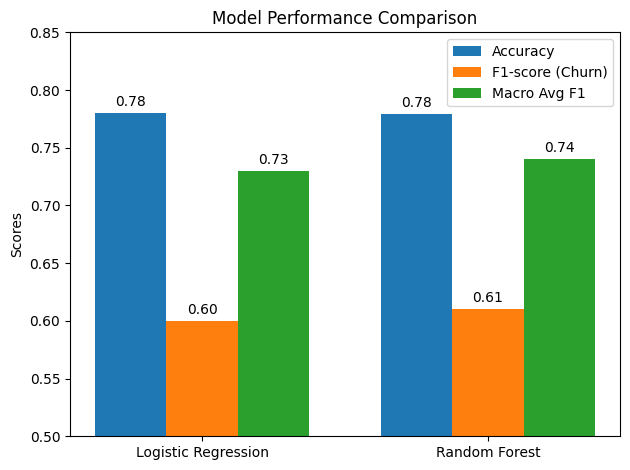

In [66]:
# --- Plotting Model Performance Comparison ---

# Metrics from the models
models = ['Logistic Regression', 'Random Forest']
accuracy = [0.7797, 0.7789]
f1_class1 = [0.60, 0.61]
macro_avg_f1 = [0.73, 0.74]

x = np.arange(len(models))
width = 0.25

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x, f1_class1, width, label='F1-score (Churn)')
bars3 = ax.bar(x + width, macro_avg_f1, width, label='Macro Avg F1')

# Formatting
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0.5, 0.85)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


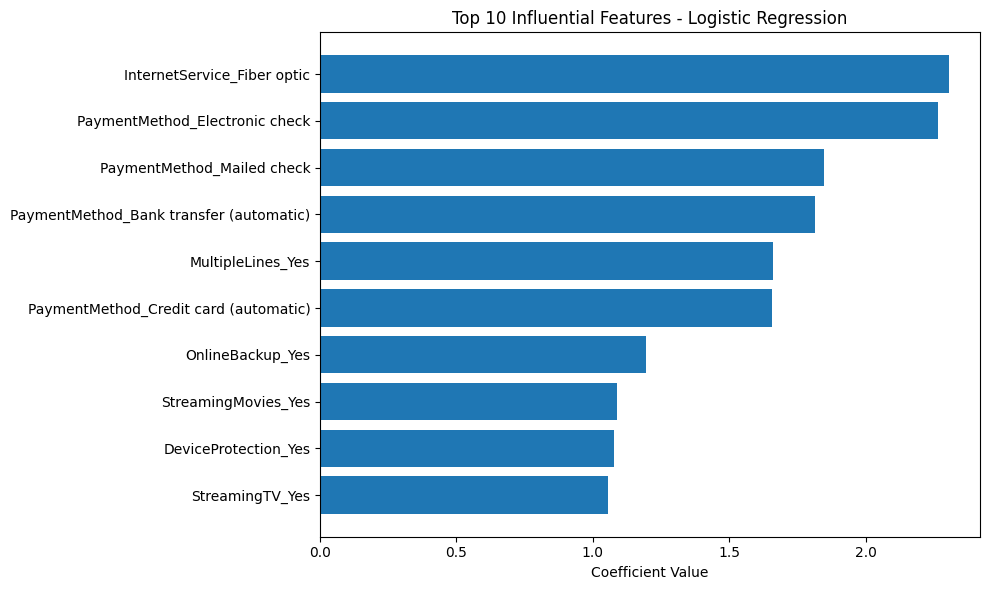

In [67]:
# --- Feature Importance from Logistic Regression ---

# Get feature names
feature_names = X_train.columns

# Get coefficients from the best logistic regression model
coefficients = best_logreg.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value (importance)
coef_df['abs_coeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coeff', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'].head(10), coef_df['Coefficient'].head(10))
plt.xlabel("Coefficient Value")
plt.title("Top 10 Influential Features - Logistic Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("logistic_regression_feature_importance.png")  # Save for report
plt.show()



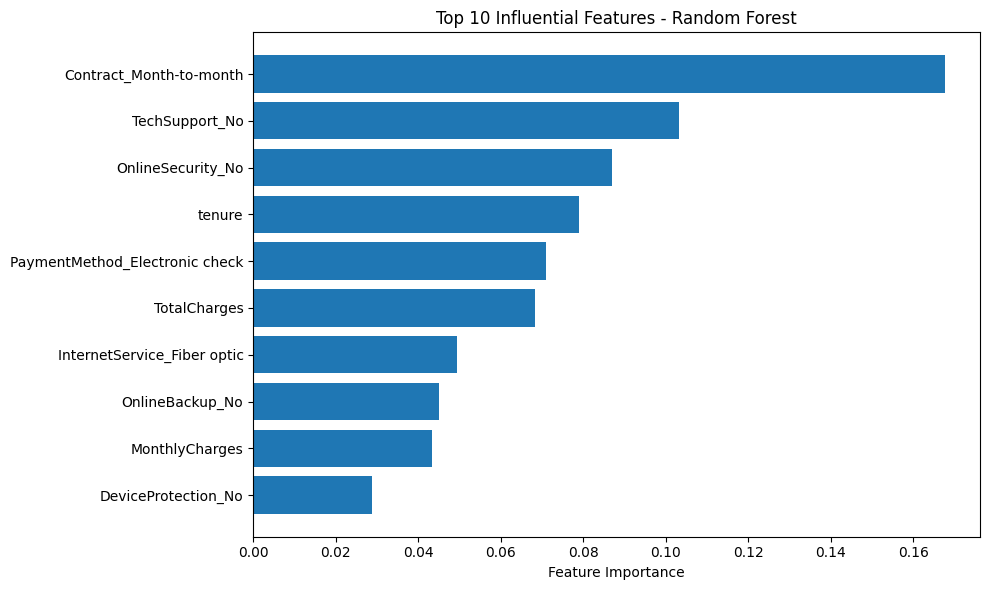

In [68]:
# --- Visualize Feature Importance from Random Forest ---

# Get feature importances from best RF model
importances = best_rf.feature_importances_

# Create DataFrame for feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'].head(10), rf_importance_df['Importance'].head(10))
plt.xlabel("Feature Importance")
plt.title("Top 10 Influential Features - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png")  # Save for report
plt.show()


In [71]:
# Save Logistic Regression model
joblib.dump(best_logreg, "logistic_regression_model.pkl")

# Save Random Forest model
joblib.dump(best_rf, "random_forest_model.pkl")

print("Models saved successfully.")


Models saved successfully.


jupyter nbconvert --to script Churn Prediction.ipynb
